In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

## Training Data

In [ ]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/train.csv?raw=true'
traindata = pd.read_csv(dataset_url)
traindata.head()


,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [ ]:
# Dropping id column
traindata = traindata.drop("id", axis=1)
traindata.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,...,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [ ]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 21 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   MonsoonIntensity                 1117957 non-null  int64  
 1   TopographyDrainage               1117957 non-null  int64  
 2   RiverManagement                  1117957 non-null  int64  
 3   Deforestation                    1117957 non-null  int64  
 4   Urbanization                     1117957 non-null  int64  
 5   ClimateChange                    1117957 non-null  int64  
 6   DamsQuality                      1117957 non-null  int64  
 7   Siltation                        1117957 non-null  int64  
 8   AgriculturalPractices            1117957 non-null  int64  
 9   Encroachments                    1117957 non-null  int64  
 10  IneffectiveDisasterPreparedness  1117957 non-null  int64  
 11  DrainageSystems                  1117957 non-null 

## Test File

In [ ]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/test.csv?raw=true'
testdata = pd.read_csv(test_url)
testdata = testdata.drop("id", axis=1)
testdata.head()


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
2,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
3,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
4,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5


In [ ]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745305 entries, 0 to 745304
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   MonsoonIntensity                 745305 non-null  int64
 1   TopographyDrainage               745305 non-null  int64
 2   RiverManagement                  745305 non-null  int64
 3   Deforestation                    745305 non-null  int64
 4   Urbanization                     745305 non-null  int64
 5   ClimateChange                    745305 non-null  int64
 6   DamsQuality                      745305 non-null  int64
 7   Siltation                        745305 non-null  int64
 8   AgriculturalPractices            745305 non-null  int64
 9   Encroachments                    745305 non-null  int64
 10  IneffectiveDisasterPreparedness  745305 non-null  int64
 11  DrainageSystems                  745305 non-null  int64
 12  CoastalVulnerability          

# Correlation of variables

Here in this section, I checked the pair plots of all features and correlation heatmap


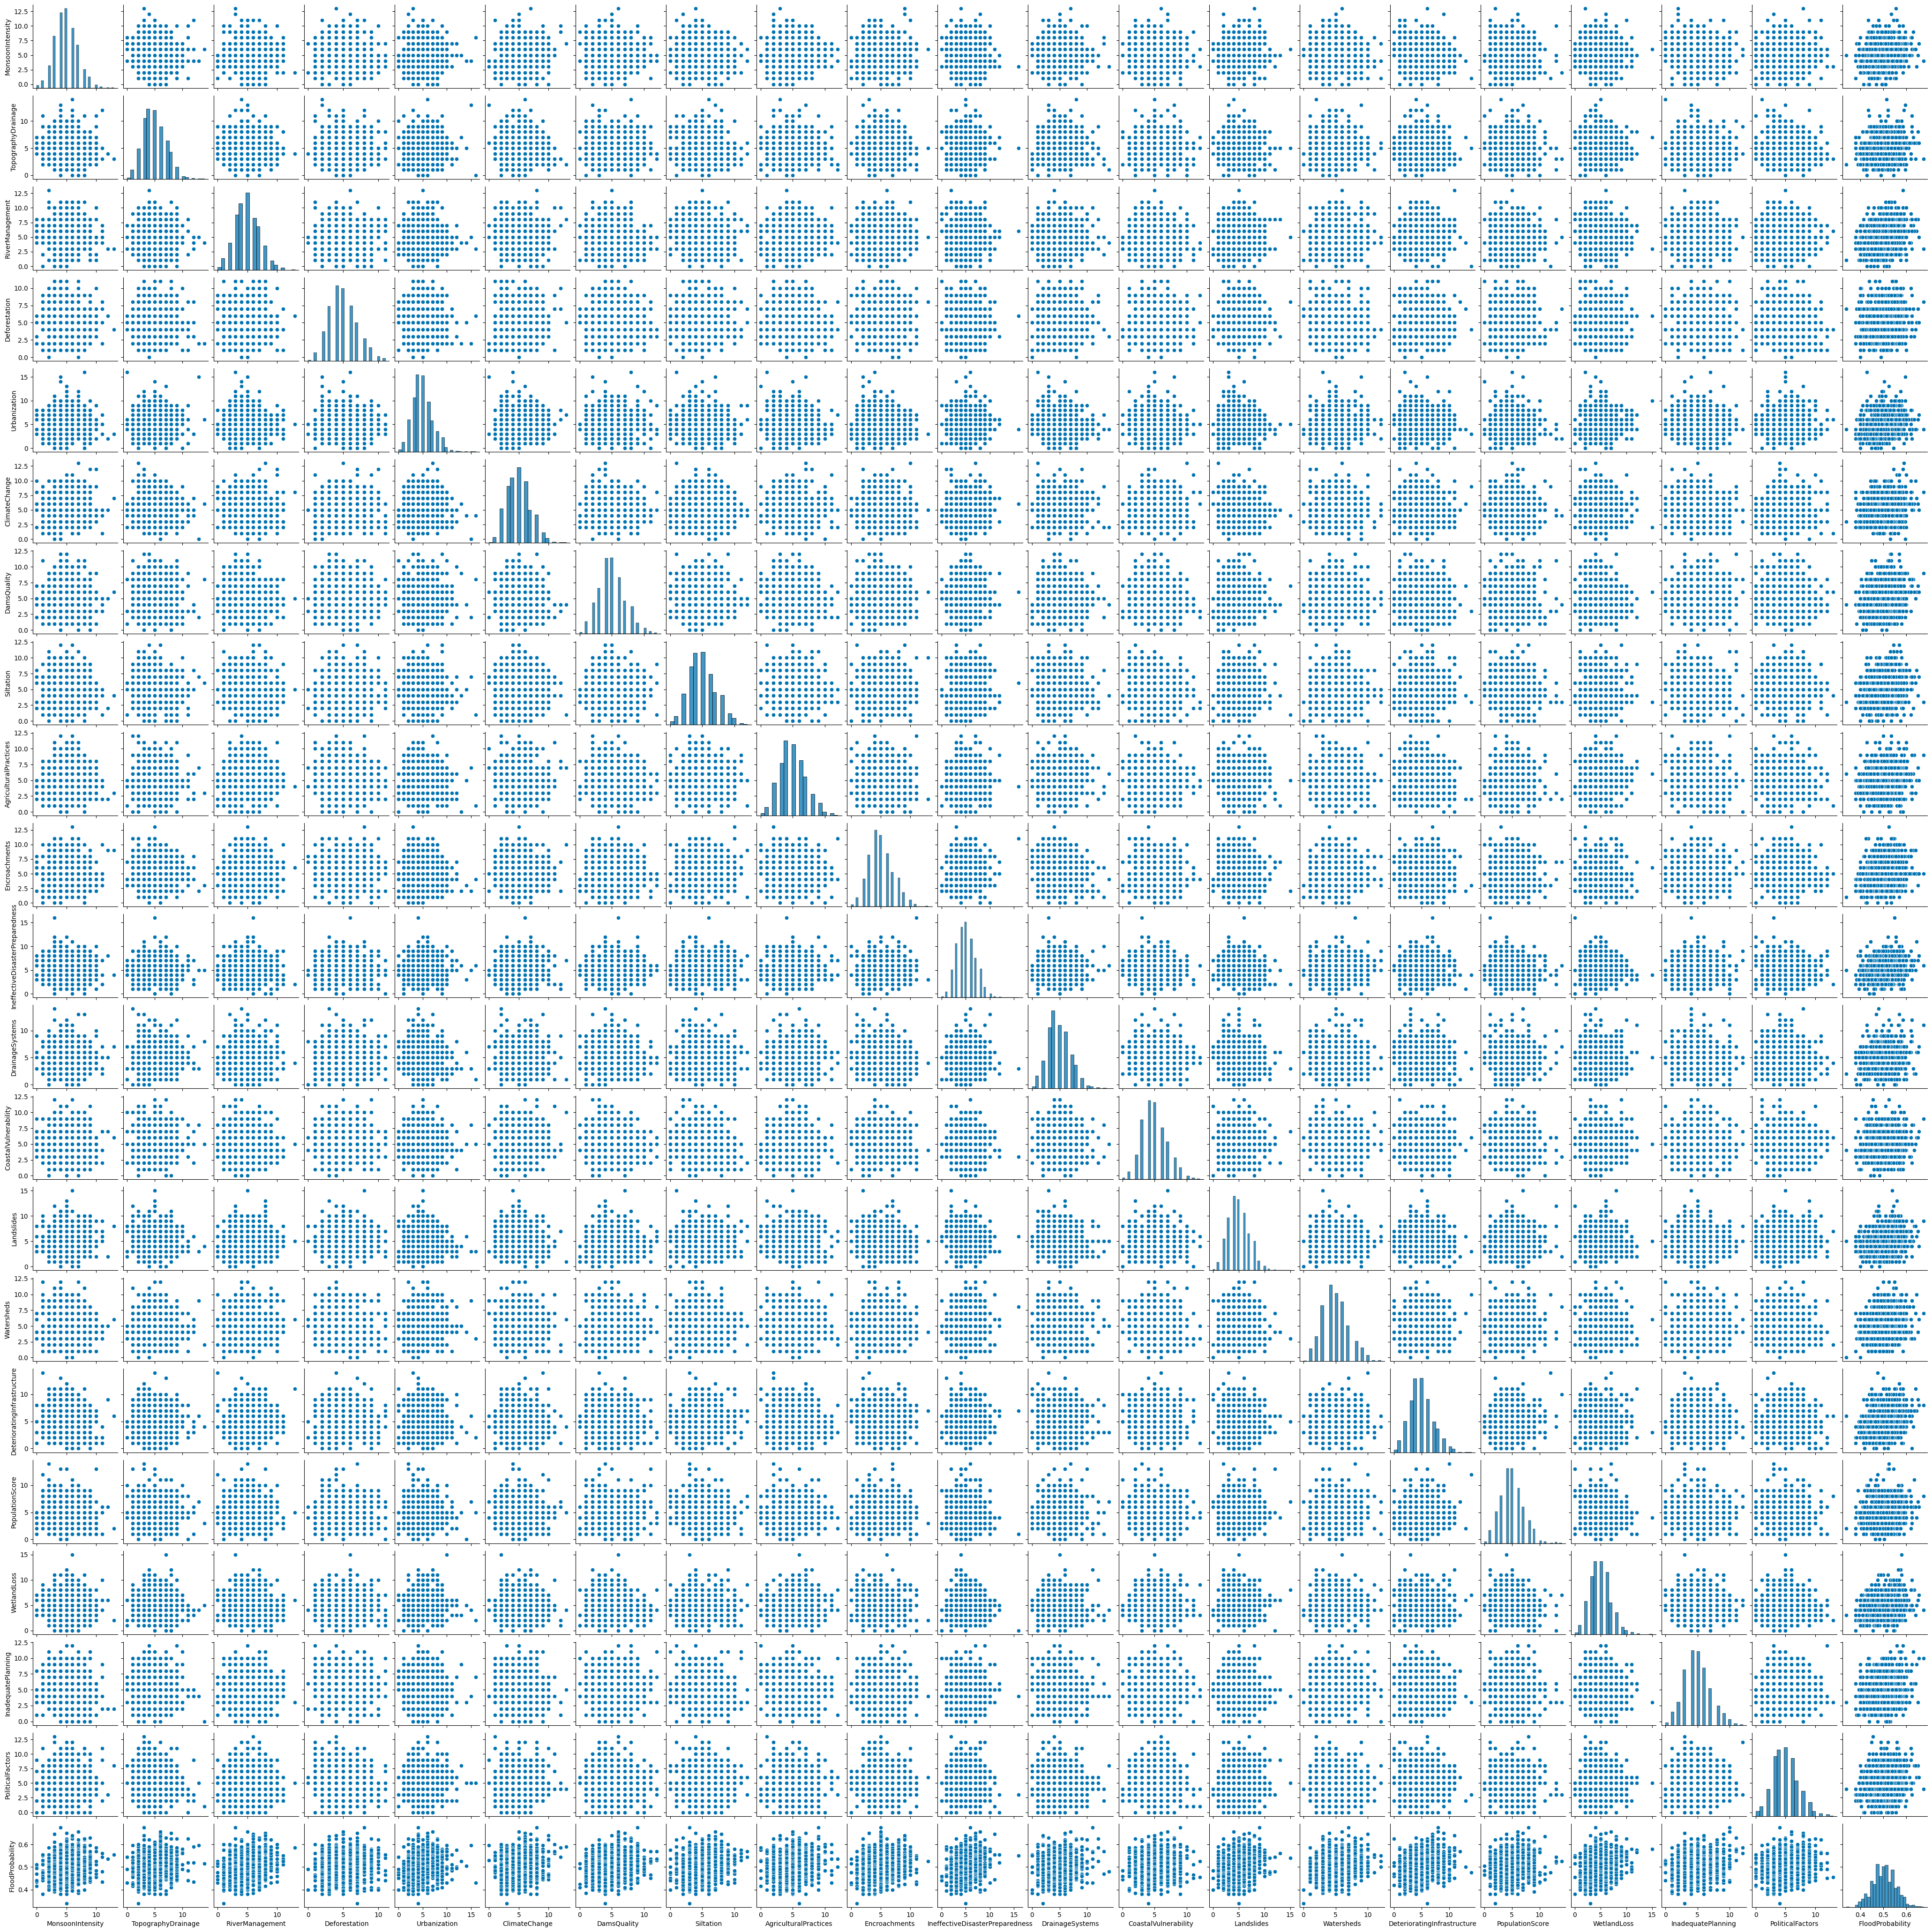

In [ ]:
# Using seaborne Pairplot for a sample of 1000
sns.set_palette('colorblind')
sns.pairplot(data=traindata.sample(n=1000), height=2)

In [ ]:
# Checking the correlation

correlation = traindata.corr()
correlation

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
MonsoonIntensity,1.000000,-0.007362,-0.008070,-0.007251,-0.009309,-0.008031,-0.007787,-0.007836,-0.008232,-0.010309,...,-0.009716,-0.010659,-0.009121,-0.008900,-0.008486,-0.008679,-0.006811,-0.008155,-0.008474,0.189098
TopographyDrainage,-0.007362,1.000000,-0.009924,-0.008548,-0.010532,-0.009619,-0.007607,-0.009824,-0.009496,-0.012887,...,-0.010056,-0.012526,-0.010240,-0.011067,-0.006628,-0.010815,-0.010267,-0.011617,-0.012350,0.187635
RiverManagement,-0.008070,-0.009924,1.000000,-0.008574,-0.012292,-0.009237,-0.008711,-0.010058,-0.010783,-0.011615,...,-0.011277,-0.011680,-0.008994,-0.011412,-0.005827,-0.006727,-0.010069,-0.009673,-0.011550,0.187131
Deforestation,-0.007251,-0.008548,-0.008574,1.000000,-0.012248,-0.008266,-0.009356,-0.011536,-0.010039,-0.013175,...,-0.010490,-0.012388,-0.009257,-0.010671,-0.008862,-0.011777,-0.011004,-0.010424,-0.009661,0.184001
Urbanization,-0.009309,-0.010532,-0.012292,-0.012248,1.000000,-0.011199,-0.011128,-0.010153,-0.010559,-0.010784,...,-0.012572,-0.014497,-0.010582,-0.012107,-0.010656,-0.011485,-0.011023,-0.011584,-0.013005,0.180861
ClimateChange,-0.008031,-0.009619,-0.009237,-0.008266,-0.011199,1.000000,-0.008427,-0.009457,-0.011517,-0.012533,...,-0.009650,-0.013005,-0.009352,-0.009882,-0.006324,-0.010332,-0.009376,-0.010772,-0.011379,0.184761
DamsQuality,-0.007787,-0.007607,-0.008711,-0.009356,-0.011128,-0.008427,1.000000,-0.009401,-0.009033,-0.010890,...,-0.010439,-0.012096,-0.009924,-0.009085,-0.009831,-0.009599,-0.009372,-0.011374,-0.013081,0.187996
Siltation,-0.007836,-0.009824,-0.010058,-0.011536,-0.010153,-0.009457,-0.009401,1.000000,-0.010179,-0.010628,...,-0.010702,-0.011762,-0.009173,-0.009457,-0.006312,-0.008739,-0.008667,-0.009079,-0.008493,0.186789
AgriculturalPractices,-0.008232,-0.009496,-0.010783,-0.010039,-0.010559,-0.011517,-0.009033,-0.010179,1.000000,-0.012244,...,-0.010845,-0.011415,-0.010624,-0.009901,-0.008708,-0.008958,-0.011392,-0.010418,-0.011157,0.183366
Encroachments,-0.010309,-0.012887,-0.011615,-0.013175,-0.010784,-0.012533,-0.010890,-0.010628,-0.012244,1.000000,...,-0.011994,-0.016203,-0.011299,-0.013542,-0.010404,-0.010645,-0.010364,-0.012175,-0.011860,0.178841


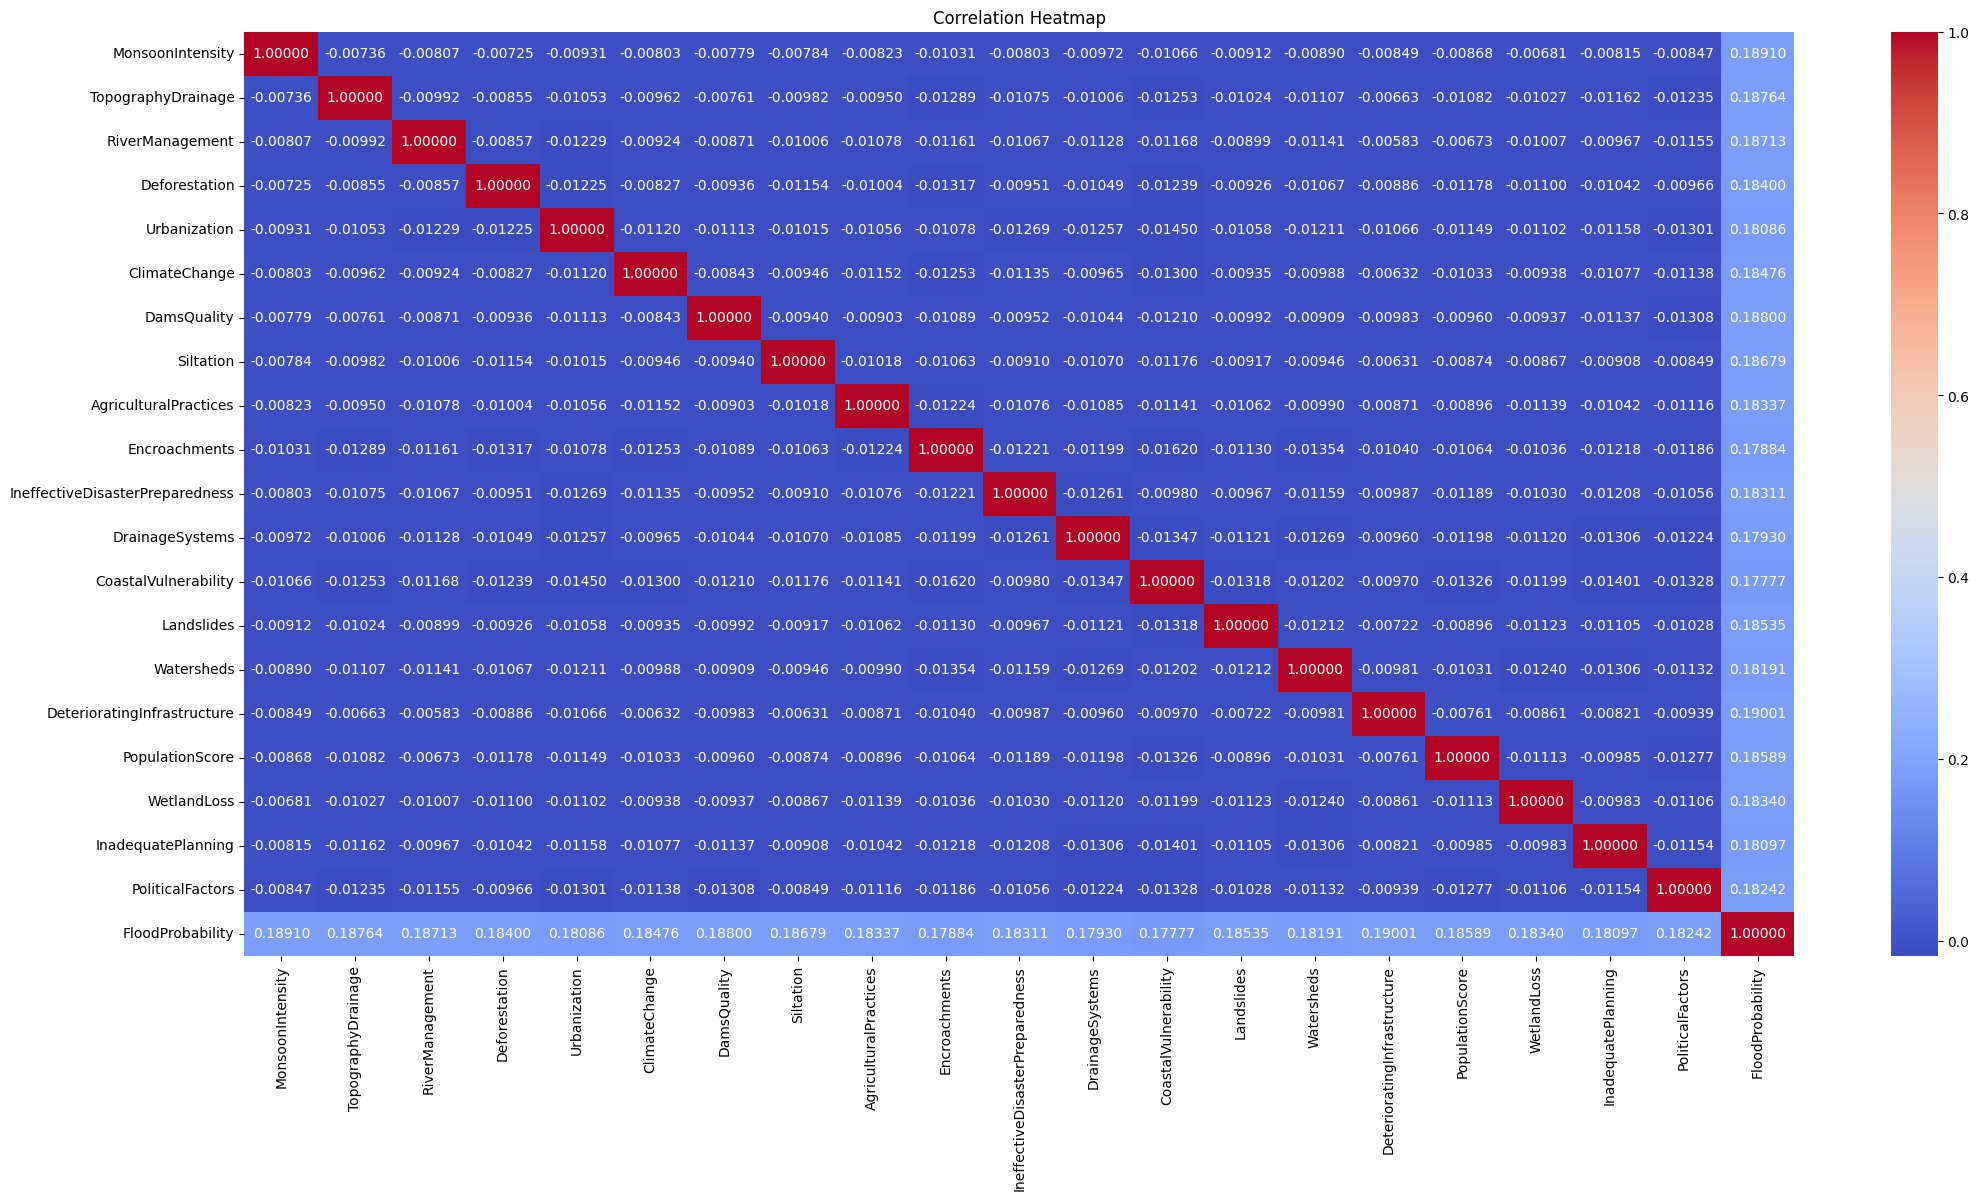

In [ ]:
# Heatmap

fig, ax = plt.subplots(figsize=(25, 12))  # Adjust width and height as needed
sns.heatmap(correlation, annot=True, cmap="coolwarm", ax=ax, fmt=".5f")
plt.title("Correlation Heatmap")
plt.show()

### Findings
From the correlation heatmap, it can be observed that all features have almost the same value of correlation with FloodProbability

## Training the model

### Splitting traindata into test and train data

In [ ]:
X = traindata.drop('FloodProbability', axis=1)
y = traindata['FloodProbability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

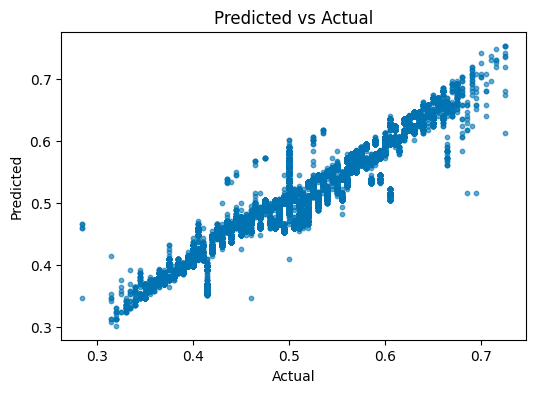

In [ ]:
#Predicted vs Actual
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, s=10, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.show()

###Model including all features and all training data

In [ ]:
# Set independent and dependent variables
X = traindata[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors']]
X = sm.add_constant(X)
testdata = sm.add_constant(testdata)
y = traindata['FloodProbability']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 21 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   const                            1117957 non-null  float64
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [ ]:
# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Test the model
y_pred = model.predict(testdata)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: -0.05329907893699115
Coefficients: [0.         0.00561159 0.00564756 0.00566643 0.00567915 0.00565772
 0.00566253 0.00565494 0.00563783 0.00563522 0.00564989 0.0056404
 0.00563556 0.00567088 0.00564163 0.0056465  0.00561563 0.0056775
 0.00563494 0.00560868 0.0056494 ]


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1117957 entries, 0 to 1117956
Series name: FloodProbability
Non-Null Count    Dtype  
--------------    -----  
1117957 non-null  float64
dtypes: float64(1)
memory usage: 8.5 MB


In [ ]:
olsmod = sm.OLS(y, X).fit()
olsmod.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       FloodProbability   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 3.046e+05
Date:                Fri, 05 Sep 2025   Prob (F-statistic):               0.00
Time:                        06:19:31   Log-Likelihood:             2.7820e+06
No. Observations:             1117957   AIC:                        -5.564e+06
Df Residuals:                 1117936   BIC:                        -5.564e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.0533      0.000   -234.995      0.000      -0.054      -0.053
MonsoonIntensity                    0.0056   9.25e-06    606.734      0.000       0.006       0.006
TopographyDrainage                  0.0056   9.09e-06    621.525      0.000       0.006       0.006
RiverManagement                     0.0057   9.18e-06    617.178      0.000       0.006       0.006
Deforestation                       0.0057   9.27e-06    612.404      0.000       0.006       0.006
Urbanization                        0.0057   9.14e-06    619.319      0.000       0.006       0.006
ClimateChange                       0.0057   9.25e-06    612.437      0.000       0.006       0.006
DamsQuality                         0.0057   9.13e-06    619.170      0.000       0.006       0.006
Siltation                           0.0056   9.21e-06    612.284      0.000       0.006       0.006
AgriculturalPractices               0.0056    9.2e-06    612.643      0.000       0.006       0.006
Encroachments                       0.0056   9.14e-06    618.374      0.000       0.006       0.006
IneffectiveDisasterPreparedness     0.0056   9.16e-06    615.995      0.000       0.006       0.006
DrainageSystems                     0.0056   9.18e-06    613.641      0.000       0.006       0.006
CoastalVulnerability                0.0057   9.11e-06    622.228      0.000       0.006       0.006
Landslides                          0.0056   9.15e-06    616.245      0.000       0.006       0.006
Watersheds                          0.0056   9.14e-06    617.853      0.000       0.006       0.006
DeterioratingInfrastructure         0.0056   9.21e-06    609.647      0.000       0.006       0.006
PopulationScore                     0.0057   9.17e-06    618.914      0.000       0.006       0.006
WetlandLoss                         0.0056    9.2e-06    612.654      0.000       0.006       0.006
InadequatePlanning                  0.0056   9.14e-06    613.363      0.000       0.006       0.006
PoliticalFactors                    0.0056    9.1e-06    620.512      0.000       0.006       0.006
==============================================================================
Omnibus:                   100155.250   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148528.907
Skew:                           0.703   Prob(JB):                         0.00
Kurtosis:                       4.100   Cond. No.                         265.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_pred_df = pd.DataFrame(y_pred, columns=['FloodProbability'])
y_pred_df.head()

,FloodProbability
0,0.573615
1,0.455243
2,0.454742
3,0.466204
4,0.466068


### Trying to see if removing some features that has correlation with each other would improve the r2 relative to the first model that includes all features

 I couldnt find any features that has high correlation with other features. But I'll try to remove those who has the highest correlation off the correlation heatmap

Based off the correlation heatmap, CoastalVulnerability and InadequatePlanning seems to have the highest correlation out of all features at -0.014. Additionally, out of all features correlated to FloodProbability, CoastalVulnerability has the lowest correlation with FloodProbability at 0.177.

In [ ]:
# Without CoastalVulnerability
X = traindata[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors']]
X = sm.add_constant(X)
testdata = sm.add_constant(testdata)
y = traindata['FloodProbability']
olsmod = sm.OLS(y, X).fit()
olsmod.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       FloodProbability   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                 2.230e+05
Date:                Fri, 05 Sep 2025   Prob (F-statistic):               0.00
Time:                        06:19:35   Log-Likelihood:             2.6158e+06
No. Observations:             1117957   AIC:                        -5.232e+06
Df Residuals:                 1117937   BIC:                        -5.231e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.0170      0.000    -66.869      0.000      -0.018      -0.017
MonsoonIntensity                    0.0055   1.07e-05    515.973      0.000       0.006       0.006
TopographyDrainage                  0.0056   1.05e-05    527.501      0.000       0.006       0.006
RiverManagement                     0.0056   1.07e-05    524.234      0.000       0.006       0.006
Deforestation                       0.0056   1.08e-05    519.706      0.000       0.006       0.006
Urbanization                        0.0056   1.06e-05    524.395      0.000       0.006       0.006
ClimateChange                       0.0056   1.07e-05    519.443      0.000       0.006       0.006
DamsQuality                         0.0056   1.06e-05    525.743      0.000       0.006       0.006
Siltation                           0.0056   1.07e-05    520.030      0.000       0.006       0.006
AgriculturalPractices               0.0056   1.07e-05    520.394      0.000       0.006       0.006
Encroachments                       0.0055   1.06e-05    522.649      0.000       0.006       0.006
IneffectiveDisasterPreparedness     0.0056   1.06e-05    524.059      0.000       0.006       0.006
DrainageSystems                     0.0055   1.07e-05    520.044      0.000       0.006       0.006
Landslides                          0.0056   1.06e-05    522.611      0.000       0.006       0.006
Watersheds                          0.0056   1.06e-05    524.449      0.000       0.006       0.006
DeterioratingInfrastructure         0.0055   1.07e-05    518.976      0.000       0.006       0.006
PopulationScore                     0.0056   1.06e-05    524.855      0.000       0.006       0.006
WetlandLoss                         0.0056   1.07e-05    520.109      0.000       0.006       0.006
InadequatePlanning                  0.0055   1.06e-05    519.585      0.000       0.005       0.006
PoliticalFactors                    0.0056   1.06e-05    526.080      0.000       0.006       0.006
==============================================================================
Omnibus:                    33667.223   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38593.192
Skew:                           0.400   Prob(JB):                         0.00
Kurtosis:                       3.436   Cond. No.                         250.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Without InadequatePlanning
X = traindata[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'PoliticalFactors']]
X = sm.add_constant(X)
testdata = sm.add_constant(testdata)
y = traindata['FloodProbability']
olsmod = sm.OLS(y, X).fit()
olsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       FloodProbability   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                 2.251e+05
Date:                Fri, 05 Sep 2025   Prob (F-statistic):               0.00
Time:                        06:19:38   Log-Likelihood:             2.6199e+06
No. Observations:             1117957   AIC:                        -5.240e+06
Df Residuals:                 1117937   BIC:                        -5.239e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.0185      0.000    -72.739      0.000      -0.019      -0.018
MonsoonIntensity                    0.0056   1.07e-05    519.397      0.000       0.006       0.006
TopographyDrainage                  0.0056   1.05e-05    530.191      0.000       0.006       0.006
RiverManagement                     0.0056   1.06e-05    527.459      0.000       0.006       0.006
Deforestation                       0.0056   1.07e-05    522.912      0.000       0.006       0.006
Urbanization                        0.0056   1.06e-05    528.126      0.000       0.006       0.006
ClimateChange                       0.0056   1.07e-05    522.779      0.000       0.006       0.006
DamsQuality                         0.0056   1.06e-05    528.324      0.000       0.006       0.006
Siltation                           0.0056   1.06e-05    523.583      0.000       0.006       0.006
AgriculturalPractices               0.0056   1.06e-05    523.102      0.000       0.006       0.006
Encroachments                       0.0056   1.06e-05    526.953      0.000       0.006       0.006
IneffectiveDisasterPreparedness     0.0056   1.06e-05    525.105      0.000       0.006       0.006
DrainageSystems                     0.0055   1.06e-05    522.479      0.000       0.006       0.006
CoastalVulnerability                0.0056   1.05e-05    529.285      0.000       0.006       0.006
Landslides                          0.0056   1.06e-05    525.904      0.000       0.006       0.006
Watersheds                          0.0056   1.06e-05    526.153      0.000       0.006       0.006
DeterioratingInfrastructure         0.0056   1.06e-05    521.877      0.000       0.006       0.006
PopulationScore                     0.0056   1.06e-05    528.814      0.000       0.006       0.006
WetlandLoss                         0.0056   1.06e-05    523.407      0.000       0.006       0.006
PoliticalFactors                    0.0056   1.05e-05    529.211      0.000       0.006       0.006
==============================================================================
Omnibus:                    34124.081   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39085.646
Skew:                           0.404   Prob(JB):                         0.00
Kurtosis:                       3.433   Cond. No.                         250.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Findings

Removing one of the two features CoastalVulnerability and InadequatePlanning with highest correlation reduces the R^2 means that if we remove other features, it would result to a reduction of R^2 as well.

Basically, since the highest correlated features resulted to a reduction, features that have a lower correlation value than the highest, means a higher reduction in R^2.

In conclusion, all features contribute to increase the R^2 and removing one of them will reduce R^2

## Sample Submission File

In [ ]:
sample_submission_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/sample_submission.csv?raw=true'

samplefile = pd.read_csv(sample_submission_url)

id = samplefile.pop('id')
y_pred = model.predict(testdata)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'id': id,
    'FloodProbability': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv
